### NOTE: Neither the lines of code nor text have been proofread and some of the writing have been taken directly from the OpenCV documentation

In [1]:
import cv2 as cv
import numpy as np

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

Covers:

<ol>
    <li>Changing Colorspaces</li>
    <li>Geometric Transformations of Images</li>
    <li>Image Thresholding</li>
    <li>Filtering and Smoothing Images</li>
</ol>

### Changing Colorspaces

In [2]:
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print( flags )

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

**HSV**

Stands for ***hue, saturation, and value***:

*Hue* refers to the perceived colour and takes a value between 0 and 360, but OpenCV uses a scale between 0 and 179.

*Saturation* refers to the purity and intensity of the perceived colour and takes a value between 0 and 100, but OpenCV uses a scale between 0 and 255.

*Value* refers to the relative lightness or darkness of the perceived colour and takes a value between 0 and 100, but OpenCV uses a scale between 0 and 255.

For more, see:
<br>
https://www.masterclass.com/articles/how-to-use-hsv-color-model-in-photography

Because the OpenCV scale differs from the standard scale, normalisation is necessary when setting it against the standard scale. In fact, different software use scales that differ from the standard scale so when comparing the results of OpenCV with other software, normalisation is required.

So, how do we convert BGR to HSV using OpenCV?

In [3]:
for i in dir(cv):
    if 'HSV' in i:
        print( i )

COLORMAP_HSV
COLOR_BGR2HSV
COLOR_BGR2HSV_FULL
COLOR_HSV2BGR
COLOR_HSV2BGR_FULL
COLOR_HSV2RGB
COLOR_HSV2RGB_FULL
COLOR_RGB2HSV
COLOR_RGB2HSV_FULL


**Object Tracking**

In the illustrating example, I will track the orange handle of a pair of scissors in a video; HSV is better suited to tracking than BGR, so let us get the HSV values for orange.

Now because OpenCV uses a different HSV scale to the standard HSV scale, we first find the RGB values for orange, which when we google online, we find to be [255, 165, 0]; we need to convert this to BGR, which makes it [0, 165, 255], which in turn we can easily convert to HSV on OpenCV's HSV scale

In [24]:
orange = np.uint8([[[0, 165, 255]]]) # Note the level of embedding - this is important!
hsv_orange = cv.cvtColor(orange, cv.COLOR_BGR2HSV)
hsv_orange

array([[[ 19, 255, 255]]], dtype=uint8)

In [14]:
"""Code for tracking the orange handle of a pair of scissors and saving the frames"""

cap = cv.VideoCapture(0)
count = 0

if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    else:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        
        # Defining range of orange color in HSV 
        lower_orange = np.array([[[10, 120, 150]]])
        upper_orange = np.array([[[29, 255, 255]]])
        
        # Threshold the HSV image to get only orange colors
        mask = cv.inRange(hsv, lower_orange, upper_orange)
        
        # Bitwise-AND mask and original image
        res = cv.bitwise_and(frame,frame, mask= mask)
          
        cv.imshow('frame', frame)
        cv.imshow('mask', mask)
        cv.imshow('res', res)
        cv.imwrite("bank_videos/VidCap2/frame%d.png" % count, frame)
        cv.imwrite("bank_videos/VidCap2/res%d.png" % count, res)
        ret, frame = cap.read()
        count += 1
        
        if cv.waitKey(1) == ord('q'):  # The user should open capture window
            break                      # striking the 'q' key ends the capture

In [17]:
cap.release()

In [16]:
cv.destroyAllWindows()

I will save this except this time, the capture will come from a prior recording of myself with the scissors using my computer ap

In [3]:
orange = np.uint8([[[0, 165, 255]]]) # Note the level of embedding - this is important!
hsv_orange = cv.cvtColor(orange, cv.COLOR_BGR2HSV)

cap = cv.VideoCapture('bank_videos/WIN_20240403_02_58_34_Pro.mp4')
codec = cv.VideoWriter_fourcc(*"mp4v")
out = cv.VideoWriter('bank_videos/Orange_scissor_head_tracker.mp4', codec, 30.0, (1920, 1080))

if not cap.isOpened():
    print("Unable to start capturing")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # if frame is read correctly ret is True
    if not ret:
        cv.waitKey()
        break
    else:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        
        # Defining range of orange color in HSV 
        lower_orange = np.array([[[10, 120, 150]]])
        upper_orange = np.array([[[29, 255, 255]]])
        
        # Threshold the HSV image to get only orange colors
        mask = cv.inRange(hsv, lower_orange, upper_orange)
        
        # Bitwise-AND mask and original image
        res = cv.bitwise_and(frame,frame, mask= mask)
        out.write(res)

cap.release()
out.release()

Done!

In [18]:
"""Code for tracking the orange handle of a pair of scissors and saving the video"""

cap = cv.VideoCapture(0)

# Define the codec and create VideoWriter object
codec = cv.VideoWriter_fourcc(*"mp4v")
out_frame = cv.VideoWriter('cap_video2_frame.mp4', codec, 20.0, (640, 480))
out_res = cv.VideoWriter('cap_video2_res.mp4', codec, 20.0, (640, 480))

while cap.isOpened():
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
        
    else:
        frame = cv.flip(frame, 180) # The number tells you the rotation from upside down
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        
        # Defining range of orange color in HSV 
        lower_orange = np.array([[[10, 120, 150]]])
        upper_orange = np.array([[[29, 255, 255]]])
        
        # Threshold the HSV image to get only orange colors
        mask = cv.inRange(hsv, lower_orange, upper_orange)
        
        # Bitwise-AND mask and original image
        res = cv.bitwise_and(frame,frame, mask= mask)
        
        out_frame.write(frame)
        out_res.write(res)
          
        cv.imshow('frame', frame)
        cv.imshow('mask', mask)
        cv.imshow('res', res)
        
        if cv.waitKey(1) == ord('q'):  # The user should open capture window
            break                      # striking the 'q' key ends the capture

In [19]:
cap.release()
out_frame.release()
out_res.release()

In [20]:
cv.destroyAllWindows()

Supposing you wanted to track multiple colours? Unfortunately (or fortunately, depending on your way of looking at it) <code>cv.inRange()</code> is unable to work with a disjointed range; this makes HSV unsuitable for multi-colour tracking as the S and V parts can place the colours of interest at separate regions of the HSV scale. The BGR system on the other hand does not have such problem (because of its simplicity) and so I use this for multi-colour tracking (although it is less thorough than HSV)

In [3]:
"""Code for tracking yellow folder and orange handle of pair of scissors and saving the video"""

cap = cv.VideoCapture(0)

# Define the codec and create VideoWriter object
codec = cv.VideoWriter_fourcc(*"mp4v")
out_frame = cv.VideoWriter('cap_video3_frame.mp4', codec, 20.0, (640, 480))
out_res = cv.VideoWriter('cap_video3_res.mp4', codec, 20.0, (640, 480))

while cap.isOpened():
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
        
    else:
        frame = cv.flip(frame, 180) # The number tells you the rotation from upside down

        # Defining color range in BGR
        orange_end = np.array([[[0, 100, 220]]])
        yellow_end = np.array([[[100, 255, 255]]])
        
        # Find only the colours in the defined range
        mask = cv.inRange(frame, orange_end, yellow_end)

        # Bitwise-AND mask and original image
        res = cv.bitwise_and(frame,frame, mask= mask)

        out_frame.write(frame)
        out_res.write(res)

        cv.imshow('frame', frame)
        cv.imshow('mask', mask)
        cv.imshow('res', res)

        if cv.waitKey(1) == ord('q'):  # The user should open capture window
            break                      # striking the 'q' key ends the capture

In [4]:
cap.release()
out_frame.release()
out_res.release()

In [5]:
cv.destroyAllWindows()

### Geometric Transformations of Images

For a decent mathematical summary of linear and affine transformations, see the *OU MS221 Exploring Mathematics Handbook (pp59-61)*

**Scaling**

In [4]:
img = cv.imread("bank_images/test3.png")
res = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)
cv.imshow("res", res)
cv.waitKey(0)
cv.destroyAllWindows()

**Translation**

In [5]:
img.shape

(498, 883, 3)

Using the matrix <em>M</em>

<img src="https://latex.codecogs.com/svg.image?\small&space;M=\begin{bmatrix}1&0&t_{x}\\0&1&t_{y}\\\end{bmatrix}" />

In [9]:
rows,cols,channel = img.shape
M = np.float32([[1,0,100], [0,1,50]])

dst = cv.warpAffine(img,M,(cols,rows))
cv.imshow('img',dst)
cv.waitKey(0)
cv.destroyAllWindows()

**Rotation**

<img src="https://latex.codecogs.com/svg.image?\small&space;&space;M=\begin{bmatrix}cos\theta&-sin\theta\\sin\theta&cos\theta\\\end{bmatrix}"   />

However, OpenCV uses the following:

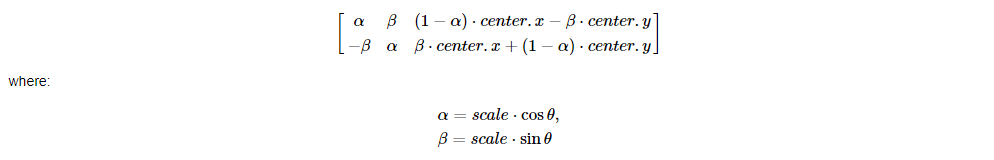

This enables rotation at any location you prefer

In [12]:
rows,cols,channel = img.shape
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv.warpAffine(img,M,(cols,rows))
cv.imshow('img',dst)
cv.waitKey(0)
cv.destroyAllWindows()

**Affine Transformation**

This is basically the combination of translation, rotation, scaling and/or *shearing*. For a more detailed treatment, see:
<br>
https://homepages.inf.ed.ac.uk/rbf/HIPR2/affine.htm

The result is that all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from the input image and their corresponding locations in the output image. Then <code>cv.getAffineTransform</code> will create a 2x3 matrix which is to be passed to <code>cv.warpAffine</code>.

(<AxesSubplot:title={'center':'Output'}>,
 Text(0.5, 1.0, 'Output'))

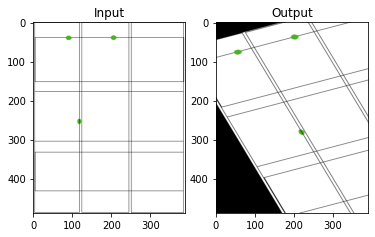

In [14]:
img = cv.imread("bank_images/test5.png")
rows,cols,channel = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')

**Perspective Transformation**

This involves the transformation of a 3d view to a 2d view and is related to the *frame of reference*.

Description of a 3d view requires 5 frames of reference:

<ul>
    <li>object</li>
    <li>world</li>
    <li>camera</li>
    <li>image</li>
    <li>pixel</li>
</ul>

The first three are 3d frames of reference but the last two are 2d. Coversion from 3d to 2d involves the following sequence:

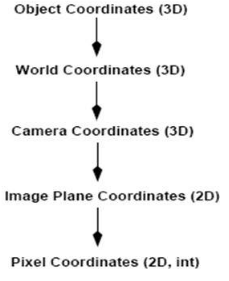

Mathematically:

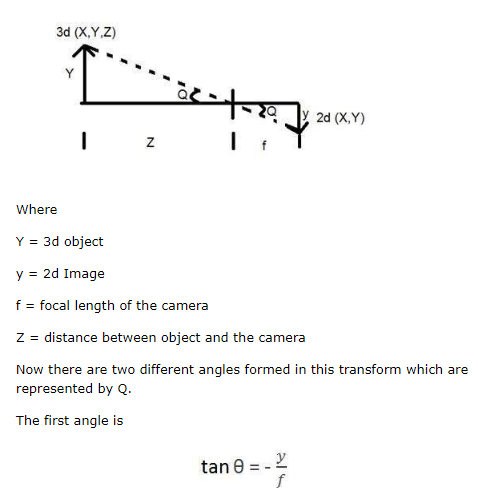

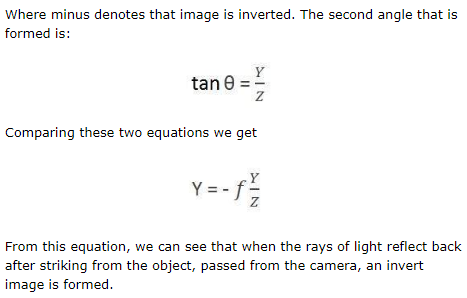

For more on this, see https://www.tutorialspoint.com/dip/perspective_transformation.htm

To perform perspective transformation with OpenCV:

You need a 3x3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear (I find it is best to choose 4 points that make up the 4 corners of a rectangle). Then the transformation matrix can be found by the function <code>cv.getPerspectiveTransform</code>. Then apply <code>cv.warpPerspective</code> with this 3x3 transformation matrix.

In [66]:
img = cv.imread("bank_images/test7.png")

img.shape

(481, 640, 3)

(<AxesSubplot:title={'center':'Output'}>,
 Text(0.5, 1.0, 'Output'))

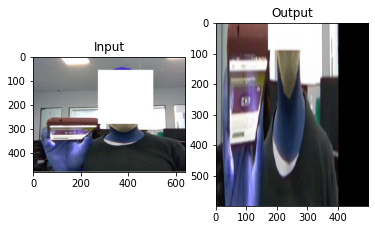

In [67]:
rows,cols,ch = img.shape

pts1 = np.float32([[0, 260], [640, 260], [0, 400], [640, 400]]) # Rough coordinates of green dots
pts2 = np.float32([[0, 0], [400, 0], [0, 640], [400, 640]])

M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(500, 600))  # columns, rows (and not rows, columns)

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')

The above example was taken from https://www.geeksforgeeks.org/perspective-transformation-python-opencv/

The one below is my example

In [68]:
img = cv.imread("bank_images/test6i_withgreenmarkings_cropped.jpg")

img.shape

(867, 1187, 3)

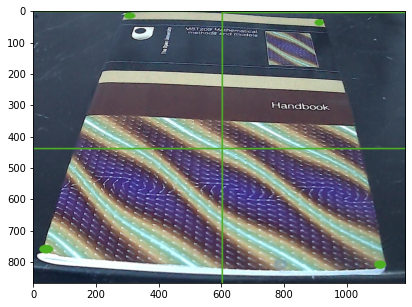

In [69]:
plt.figure(figsize=(9,5))
plt.imshow(img)

(<AxesSubplot:title={'center':'Output'}>,
 Text(0.5, 1.0, 'Output'))

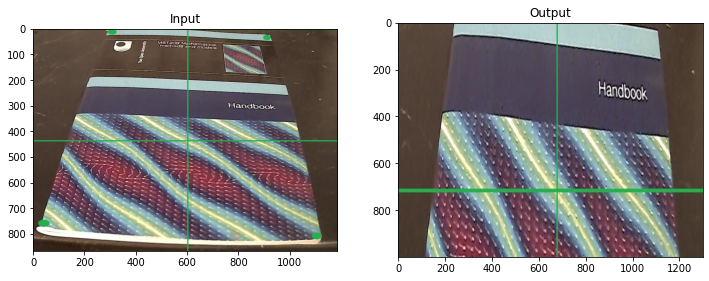

In [92]:
rows,cols,ch = img.shape
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Conversion from OpenCV to Matplotlib color system

pts1 = np.float32([[0,210],[770,210],[0,910],[770,910]]) # Select points that make a rectangle
pts2 = np.float32([[0,0],[867,0],[0,2200],[867,2200]]) # Note the destination points can exceed the
                                                       # the boundaries of the original image

M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img_rgb,M,(1300,1000))  # columns, rows (and not rows, columns)

plt.figure(figsize=(12,8))
plt.subplot(121),plt.imshow(img_rgb),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')

### Image Thresholding

**Simple Thresholding**

See relevant section in https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html

**Adaptive Thresholding**

This is sometimes the better option; see relevant section in https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html

The code below compares simple with adaptive thresholding

In [95]:
img = cv.imread('bank_images/test6ii_cropped.jpg', cv.IMREAD_GRAYSCALE)

cv.imshow("Image", img)
cv.waitKey(0)
cv.destroyAllWindows()

In [94]:
# blur = cv.medianBlur(img,5)

# cv.imshow("Image", blur)
# cv.waitKey(0)
# cv.destroyAllWindows()

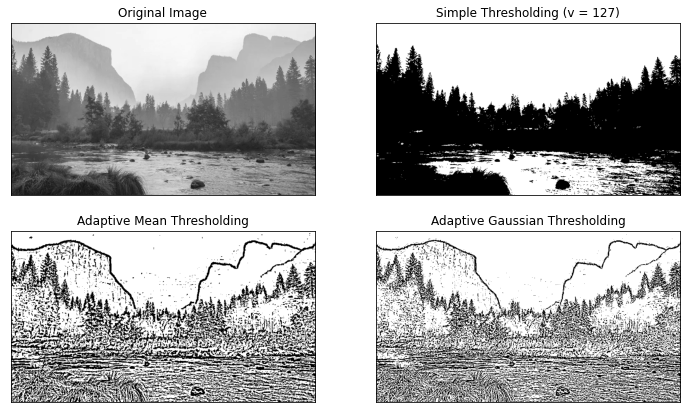

In [101]:
# Simple thresholding
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

# Adaptive thresholding
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Simple Thresholding (v = 127)', 
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
plt.figure(figsize=(12,7))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
#plt.show()

In [100]:
# Alternative image for the above example
img = cv.imread('bank_images/test3.png', cv.IMREAD_GRAYSCALE)

You can see that simple thresholding takes out the hills completely

**Otsu's Thresholding**

This tries to find an optimal threshold value for images with two distinct values ('bimodal' images). An example is shown below

In [103]:
img = cv.imread('bank_images/test8.png', cv.IMREAD_GRAYSCALE)

img.shape

(1265, 829)

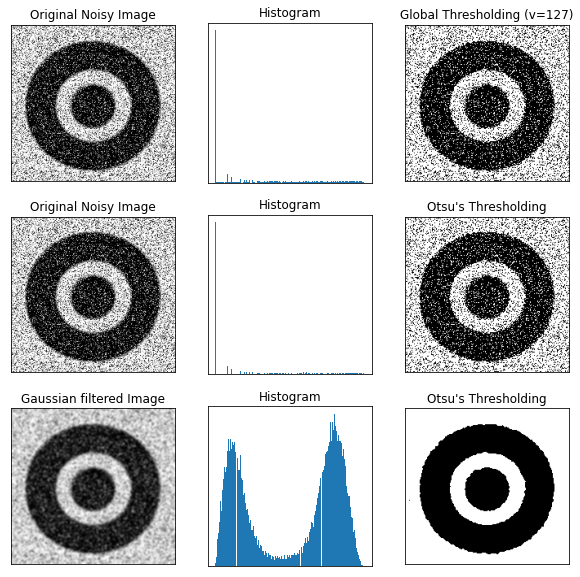

In [106]:
# Simple thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# plot all the images and their histograms
images = [
    img, 0, th1,
    img, 0, th2,
    blur, 0, th3
]

titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
 'Original Noisy Image','Histogram',"Otsu's Thresholding",
 'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])

In [105]:
# Alternative image for the above example
img = cv.imread('bank_images/test9.png', cv.IMREAD_GRAYSCALE)

It's important to state that Otsu's thresholding (also known as Otsu's Binarization) is only really effective with bimodal images. For details of how Otsu's Binarization works, see
<br>
https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html

### Filtering and Smoothing Images

**Filtering (2d Convolution)**

As in one-dimensional signals, images also can be filtered with various low-pass filters (LPF), high-pass filters (HPF), etc. LPF helps in removing noise, blurring images, etc. HPF filters help in finding edges in images.

OpenCV provides a function <code>cv.filter2D()</code> to convolve a kernel with an image. As an example, we will try an averaging filter on an image. A 5x5 averaging filter kernel will look like the below:

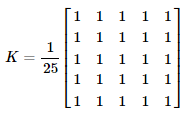

The operation works like this: keep this kernel above a pixel, add all the 25 pixels below this kernel, take the average, and replace the central pixel with the new average value. This operation is continued for all the pixels in the image. Try this code and check the result:

(([], []), ([], []))

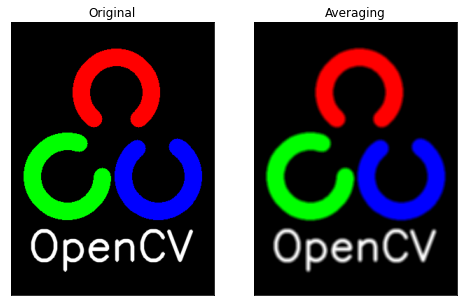

In [107]:
img = cv.imread('bank_images/logo.png')
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(rgb_img,-1,kernel)

plt.figure(figsize=(8,6))
plt.subplot(121),plt.imshow(rgb_img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])

**Blurring**

Image blurring is a surprisingly useful operation in computer vision. For a great introduction to this (as well as what a *kernel* is), see https://github.com/atduskgreg/opencv-processing-book/blob/master/book/filters/blur.md

Blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise. It actually removes high frequency content (eg: noise, edges) from the image. So edges are blurred a little bit in this operation (there are also blurring techniques which don't blur the edges).


OpenCV provides four main types of blurring techniques.

<ul>
    <li>Averaging</li>
    <li>Gaussian Blurring</li>
    <li>Median Blurring</li>
    <li>Bilateral Filtering</li>
</ul>

***Averaging***

This is done by convolving an image with a normalized box filter. It simply takes the average of all the pixels under the kernel area and replaces the central element. This is done by the function <code>cv.blur()</code> or <code>cv.boxFilter()</code>. Check the docs for more details about the kernel. We should specify the width and height of the kernel. A 3x3 normalized box filter would look like the below:

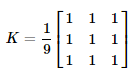

***Gaussian Blurring***

In this method, instead of a box filter, a Gaussian kernel is used. It is done with the function, <code>cv.GaussianBlur()</code>. We should specify the width and height of the kernel which should be positive and **odd**. We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as the same as sigmaX. If both are given as zeros, they are calculated from the kernel size. Gaussian blurring is highly effective in removing Gaussian noise from an image.

If you want, you can create a Gaussian kernel with the function, <code>cv.getGaussianKernel()</code>.

***Median Blurring***

Here, the function <code>cv.medianBlur()</code> takes the median of all the pixels under the kernel area and the central element is replaced with this median value. This is highly effective against salt-and-pepper noise in an image. Interestingly, in the above filters, the central element is a newly calculated value which may be a pixel value in the image or a new value. But in median blurring, the central element is always replaced by some pixel value in the image. It reduces the noise effectively. Its kernel size should be a positive odd integer.

***Bilateral Filtering***

<code>cv.bilateralFilter()</code> is highly effective in noise removal while keeping edges sharp. But the operation is slower compared to other filters. We already saw that a Gaussian filter takes the neighbourhood around the pixel and finds its Gaussian weighted average. This Gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. It doesn't consider whether pixels have almost the same intensity. It doesn't consider whether a pixel is an edge pixel or not. So it blurs the edges also, which we don't want to do.

Bilateral filtering also takes a Gaussian filter in space, but one more Gaussian filter which is a function of pixel difference. The Gaussian function of space makes sure that only nearby pixels are considered for blurring, while the Gaussian function of intensity difference makes sure that only those pixels with similar intensities to the central pixel are considered for blurring. So it preserves the edges since pixels at edges will have large intensity variation.

See more at https://docs.opencv.org/3.4/d4/d13/tutorial_py_filtering.html